## 1. Loading Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
dfx=pd.read_csv("weightedX.csv")
dfy=pd.read_csv("weightedY.csv")


In [12]:
X=dfx.values
Y=dfy.values

In [13]:
print(X.shape,Y.shape)

(99, 1) (99, 1)


In [14]:
#normalize data
X=(X-X.mean())/X.std()

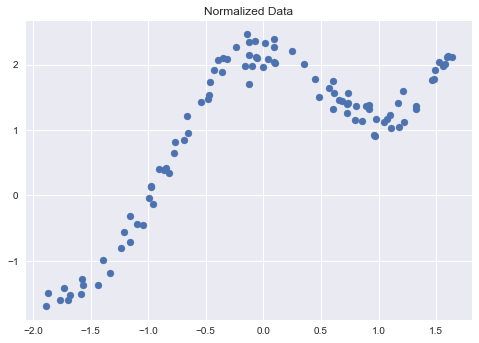

In [15]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.title("Normalized Data")
plt.show()

## 2. Finding W (m x m) diagnol matrix


In [21]:
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    
    for i in range(M):
        xi=X[i]
        x=query_point
        W[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
        
    return W

In [25]:
X=np.mat(X)
Y=np.mat(Y)
M=X.shape[0]
W=getW(-1,X,0.5)
print(W.shape)
print(W)


(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


## 3. Make Predictions

In [30]:
def predict(X,Y,query_x,tau):
    ones=np.ones((M,1))
    X_=np.hstack((X,ones))
    
    qx=np.mat([query_x,1])
    W=getW(qx,X_,tau)
    
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred=np.dot(qx,theta)
    return theta,pred

In [31]:
theta,pred=predict(X,Y,1.0,1.0)

In [32]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [33]:
print(pred)

[[1.59417694]]


## 4. Visualize predictions, change in tau

In [36]:
def plotPrediction(tau):
    X_test=np.linspace(-2,2,20)
    Y_test=[]
    
    for xq in X_test:
        theta,pred=predict(X,Y,xq,tau)
        Y_test.append(pred)
        
    X0=np.array(X)
    Y0=np.array(Y)
    
    plt.scatter(X0,Y0)
    plt.scatter(X_test,Y_test,color="red")
    plt.title("Tau/Bandwidth Parameter %.2f"%tau)
    plt.show()

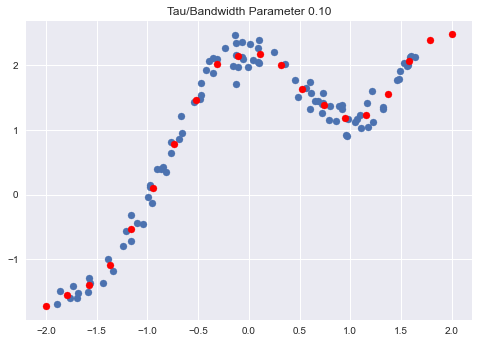

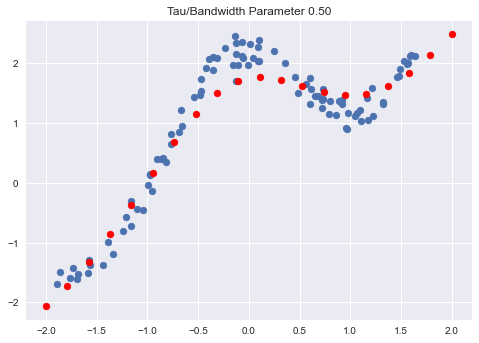

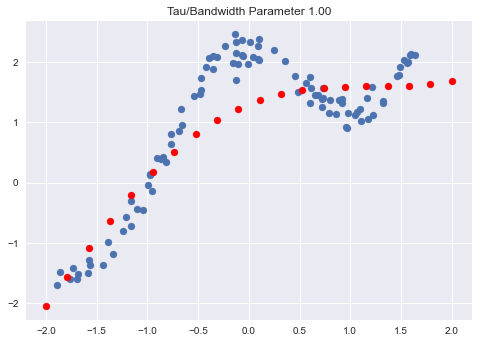

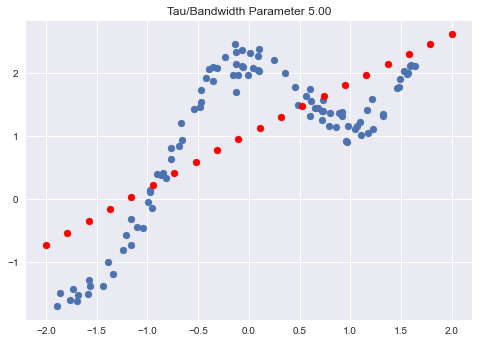

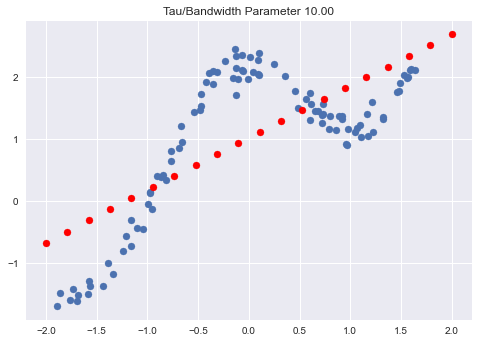

In [39]:
taus=[0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)